### Big Data Methodology on Energy Project

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [50]:
#Display all rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [51]:
#Read the bigDataDemand file
df = pd.read_excel("bigDataDemand.xlsx", skiprows = 22)
df

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1.0,1.0,2021-01-01,00:00:00,0.531210,0.347805,0.440371,0.561970,0.574668
1,winter,1.0,2.0,2021-01-01,01:00:00,0.471700,0.327317,0.375367,0.501723,0.521484
2,winter,1.0,3.0,2021-01-01,02:00:00,0.475083,0.320488,0.370968,0.500049,0.497104
3,winter,1.0,4.0,2021-01-01,03:00:00,0.464850,0.330732,0.371457,0.490416,0.473636
4,winter,1.0,5.0,2021-01-01,04:00:00,0.460960,0.361951,0.371457,0.488835,0.483912
...,...,...,...,...,...,...,...,...,...,...
8803,NaN,NaN,NaN,NaT,NaN,0.854238,0.733659,0.550342,0.655732,0.783495
8804,NaN,NaN,NaN,NaT,NaN,0.892673,0.662439,0.583089,0.686853,0.828883
8805,NaN,NaN,NaN,NaT,NaN,0.852719,0.566341,0.558651,0.673262,0.815632
8806,NaN,NaN,NaN,NaT,NaN,0.790045,0.480488,0.541056,0.652053,0.758381


# Step 1: Seasonal Statistics

In [52]:
locations = ["Tauyuan", "Hsinchu", "Taichung", "Tainan", "Taipei"]

In [53]:
lf = pd.DataFrame(columns = locations)
lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei


In [54]:
check_if_winter = df["Season"] == "winter"
check_if_winter

0        True
1        True
2        True
3        True
4        True
        ...  
8803    False
8804    False
8805    False
8806    False
8807    False
Name: Season, Length: 8808, dtype: bool

In [55]:
df_winter = df[check_if_winter]

df_winter

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1.0,1.0,2021-01-01,00:00:00,0.531210,0.347805,0.440371,0.561970,0.574668
1,winter,1.0,2.0,2021-01-01,01:00:00,0.471700,0.327317,0.375367,0.501723,0.521484
2,winter,1.0,3.0,2021-01-01,02:00:00,0.475083,0.320488,0.370968,0.500049,0.497104
3,winter,1.0,4.0,2021-01-01,03:00:00,0.464850,0.330732,0.371457,0.490416,0.473636
4,winter,1.0,5.0,2021-01-01,04:00:00,0.460960,0.361951,0.371457,0.488835,0.483912
...,...,...,...,...,...,...,...,...,...,...
8755,winter,365.0,8756.0,2021-12-31,1900-12-29 19:00:00,0.793245,0.709268,0.551808,0.641069,0.815751
8756,winter,365.0,8757.0,2021-12-31,1900-12-29 20:00:00,0.838434,0.636098,0.602639,0.686709,0.862607
8757,winter,365.0,8758.0,2021-12-31,1900-12-29 21:00:00,0.828363,0.570244,0.572336,0.678007,0.827356
8758,winter,365.0,8759.0,2021-12-31,1900-12-29 22:00:00,0.775003,0.480488,0.570870,0.660248,0.802361


In [56]:
df_winter[locations]

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,0.531210,0.347805,0.440371,0.561970,0.574668
1,0.471700,0.327317,0.375367,0.501723,0.521484
2,0.475083,0.320488,0.370968,0.500049,0.497104
3,0.464850,0.330732,0.371457,0.490416,0.473636
4,0.460960,0.361951,0.371457,0.488835,0.483912
...,...,...,...,...,...
8755,0.793245,0.709268,0.551808,0.641069,0.815751
8756,0.838434,0.636098,0.602639,0.686709,0.862607
8757,0.828363,0.570244,0.572336,0.678007,0.827356
8758,0.775003,0.480488,0.570870,0.660248,0.802361


In [57]:
df_winter[locations].mean()

Tauyuan     0.728488
Hsinchu     0.554203
Taichung    0.498420
Tainan      0.589402
Taipei      0.689429
dtype: float64

In [58]:
type(df_winter[locations].mean())

pandas.core.series.Series

In [59]:
df_winter[locations].mean().shape

(5,)

In [60]:
lf.loc["average winter",:] =  df_winter[locations].mean()


In [61]:
lf.loc["average spring",:] = df[df["Season"] == "spring"][locations].mean()


In [62]:
#Average load factor for each season
lf.loc["average summer",:] = df[df["Season"] == "summer"][locations].mean()
lf.loc["average autumn",:] = df[df["Season"] == "autumn"][locations].mean()


In [63]:
#Max load factor for each season
lf.loc["max winter",:] = df[df["Season"] == "winter"][locations].max()
lf.loc["max spring",:] = df[df["Season"] == "spring"][locations].max()
lf.loc["max summer",:] = df[df["Season"] == "summer"][locations].max()
lf.loc["max autumn",:] = df[df["Season"] == "autumn"][locations].max()

In [64]:
#Min load factor for each season
lf.loc["min winter",:] = df[df["Season"] == "winter"][locations].min()
lf.loc["min spring",:] = df[df["Season"] == "spring"][locations].min()
lf.loc["min summer",:] = df[df["Season"] == "summer"][locations].min()
lf.loc["min autumn",:] = df[df["Season"] == "autumn"][locations].min()

In [65]:
lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
average winter,0.728488,0.554203,0.49842,0.589402,0.689429
average spring,0.593338,0.570913,0.600541,0.630528,0.648578
average summer,0.6791,0.723053,0.781284,0.786295,0.814008
average autumn,0.625943,0.554023,0.602084,0.671974,0.702872
max winter,1.0,0.73561,0.667155,0.697033,0.875144
max spring,0.776172,0.940488,0.92522,0.848171,0.922615
max summer,0.946967,1.0,1.0,1.0,1.0
max autumn,0.869396,1.0,0.945748,0.969539,0.961773
min winter,0.39396,0.297073,0.318671,0.451557,0.465384
min spring,0.346662,0.298049,0.352395,0.430999,0.453124


We get a dataframe called ```lf``` comprising of various seasonal statistics of load factor for given five locations.

## step2: daily average load factor

Initialize a new dataframe called ```daily_lf``` consisting of each location as columns.

In [66]:
daily_lf = pd.DataFrame(columns = locations)
daily_lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei


In [67]:
#Create a list for number of days in a year
days_in_year = np.arange(1,366)
days_in_year

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [68]:
df.head()

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1.0,1.0,2021-01-01,00:00:00,0.531210,0.347805,0.440371,0.561970,0.574668
1,winter,1.0,2.0,2021-01-01,01:00:00,0.471700,0.327317,0.375367,0.501723,0.521484
2,winter,1.0,3.0,2021-01-01,02:00:00,0.475083,0.320488,0.370968,0.500049,0.497104
3,winter,1.0,4.0,2021-01-01,03:00:00,0.464850,0.330732,0.371457,0.490416,0.473636
4,winter,1.0,5.0,2021-01-01,04:00:00,0.460960,0.361951,0.371457,0.488835,0.483912


In [69]:
df["number of day"] == 1

0        True
1        True
2        True
3        True
4        True
        ...  
8803    False
8804    False
8805    False
8806    False
8807    False
Name: number of day, Length: 8808, dtype: bool

In [70]:
df[df["number of day"] ==1]

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1.0,1.0,2021-01-01,00:00:00,0.531210,0.347805,0.440371,0.561970,0.574668
1,winter,1.0,2.0,2021-01-01,01:00:00,0.471700,0.327317,0.375367,0.501723,0.521484
2,winter,1.0,3.0,2021-01-01,02:00:00,0.475083,0.320488,0.370968,0.500049,0.497104
3,winter,1.0,4.0,2021-01-01,03:00:00,0.464850,0.330732,0.371457,0.490416,0.473636
4,winter,1.0,5.0,2021-01-01,04:00:00,0.460960,0.361951,0.371457,0.488835,0.483912
5,winter,1.0,6.0,2021-01-01,05:00:00,0.466181,0.438537,0.381720,0.497605,0.489784
6,winter,1.0,7.0,2021-01-01,06:00:00,0.488694,0.538537,0.409580,0.540760,0.524955
7,winter,1.0,8.0,2021-01-01,07:00:00,0.544477,0.608293,0.422287,0.551456,0.588812
8,winter,1.0,9.0,2021-01-01,08:00:00,0.618418,0.623902,0.477028,0.577215,0.621464
9,winter,1.0,10.0,2021-01-01,09:00:00,0.673255,0.613171,0.478983,0.587719,0.656774


In [71]:
daily_lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei


In [72]:
df[df["number of day"] ==3][locations].mean() 

Tauyuan     0.523301
Hsinchu     0.518943
Taichung    0.463893
Tainan      0.533153
Taipei      0.616165
dtype: float64

In [73]:
#Daily average load factors based on day of the year

for k in days_in_year:
    
    daily_lf.loc[k,:] = df[df["number of day"] ==k][locations].mean() 

In [74]:
daily_lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
1,0.603982,0.533415,0.475379,0.563411,0.611695
2,0.567664,0.526768,0.46821,0.552087,0.610788
3,0.523301,0.518943,0.463893,0.533153,0.616165
4,0.604993,0.517866,0.471835,0.568442,0.618904
5,0.607709,0.530447,0.468068,0.578596,0.621409
6,0.594077,0.521402,0.463913,0.573018,0.627028
7,0.600004,0.518455,0.459963,0.56731,0.632099
8,0.598724,0.519289,0.475806,0.569735,0.631797
9,0.554509,0.520163,0.46373,0.540347,0.622334
10,0.506224,0.503923,0.446522,0.529768,0.629455


In [75]:
daily_lf.reset_index(inplace=True)

daily_lf

,index,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,1,0.603982,0.533415,0.475379,0.563411,0.611695
1,2,0.567664,0.526768,0.46821,0.552087,0.610788
2,3,0.523301,0.518943,0.463893,0.533153,0.616165
3,4,0.604993,0.517866,0.471835,0.568442,0.618904
4,5,0.607709,0.530447,0.468068,0.578596,0.621409
5,6,0.594077,0.521402,0.463913,0.573018,0.627028
6,7,0.600004,0.518455,0.459963,0.56731,0.632099
7,8,0.598724,0.519289,0.475806,0.569735,0.631797
8,9,0.554509,0.520163,0.46373,0.540347,0.622334
9,10,0.506224,0.503923,0.446522,0.529768,0.629455


In [76]:
daily_lf.rename(  {"index":"number of day"}, axis=1, inplace = True)

daily_lf

,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,1,0.603982,0.533415,0.475379,0.563411,0.611695
1,2,0.567664,0.526768,0.46821,0.552087,0.610788
2,3,0.523301,0.518943,0.463893,0.533153,0.616165
3,4,0.604993,0.517866,0.471835,0.568442,0.618904
4,5,0.607709,0.530447,0.468068,0.578596,0.621409
5,6,0.594077,0.521402,0.463913,0.573018,0.627028
6,7,0.600004,0.518455,0.459963,0.56731,0.632099
7,8,0.598724,0.519289,0.475806,0.569735,0.631797
8,9,0.554509,0.520163,0.46373,0.540347,0.622334
9,10,0.506224,0.503923,0.446522,0.529768,0.629455


<b>Which day in the year falls in which season?</b>

1-59 and 335 to 365: Winter

60 to 151: Spring

152 to 243: Summer

244 to 334: Autumn

In [77]:
#Create arrays to comprise specific days of year for each season
winter_days1 = np.arange(1,60)
winter_days2 = np.arange(335,366)
winter_days = np.append(winter_days1, winter_days2)

spring_days = np.arange(60,152)
summer_days = np.arange(152, 244)
autumn_days = np.arange(244, 335)

In [78]:
winter_days

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59, 335, 336, 337, 338, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365])

In [79]:
daily_lf.head()

,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,1,0.603982,0.533415,0.475379,0.563411,0.611695
1,2,0.567664,0.526768,0.46821,0.552087,0.610788
2,3,0.523301,0.518943,0.463893,0.533153,0.616165
3,4,0.604993,0.517866,0.471835,0.568442,0.618904
4,5,0.607709,0.530447,0.468068,0.578596,0.621409


In [80]:
daily_lf["number of day"][3]

4

In [81]:
type(daily_lf["number of day"][3])

numpy.int64

In [82]:
daily_lf["number of day"][3] in winter_days

True

In [83]:
#A function to specify season name based on the number of day that comes in the year

def apply_season(x):    # x will be a row of a dataframe. And from this row we pick the element at column "number of day"
    if x["number of day"] in winter_days:
  # if (x["number of day"]>=1 and x["number of day"]<=59) or (x["number of day"]>=335 and x["number of day"]<=365):      
        return "winter"
    elif x["number of day"] in spring_days:
#   elif (x["number of day"]>=60 and x["number of day"]<=151):   
        return "spring"
    elif x["number of day"] in summer_days:
#   elif (x["number of day"]>=152 and x["number of day"]<=243):   
        return "summer"
    else:
        return "autumn"

In [84]:
daily_lf.apply(lambda x: apply_season(x), axis=1)

0      winter
1      winter
2      winter
3      winter
4      winter
5      winter
6      winter
7      winter
8      winter
9      winter
10     winter
11     winter
12     winter
13     winter
14     winter
15     winter
16     winter
17     winter
18     winter
19     winter
20     winter
21     winter
22     winter
23     winter
24     winter
25     winter
26     winter
27     winter
28     winter
29     winter
30     winter
31     winter
32     winter
33     winter
34     winter
35     winter
36     winter
37     winter
38     winter
39     winter
40     winter
41     winter
42     winter
43     winter
44     winter
45     winter
46     winter
47     winter
48     winter
49     winter
50     winter
51     winter
52     winter
53     winter
54     winter
55     winter
56     winter
57     winter
58     winter
59     spring
60     spring
61     spring
62     spring
63     spring
64     spring
65     spring
66     spring
67     spring
68     spring
69     spring
70     spring
71    

In [85]:
type(daily_lf.apply(lambda x: apply_season(x), axis=1))

pandas.core.series.Series

In [86]:
daily_lf["Season"] = daily_lf.apply(lambda x: apply_season(x), axis=1)  # axis =1 means row. IE every row.

In [87]:
daily_lf

,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei,Season
0,1,0.603982,0.533415,0.475379,0.563411,0.611695,winter
1,2,0.567664,0.526768,0.46821,0.552087,0.610788,winter
2,3,0.523301,0.518943,0.463893,0.533153,0.616165,winter
3,4,0.604993,0.517866,0.471835,0.568442,0.618904,winter
4,5,0.607709,0.530447,0.468068,0.578596,0.621409,winter
5,6,0.594077,0.521402,0.463913,0.573018,0.627028,winter
6,7,0.600004,0.518455,0.459963,0.56731,0.632099,winter
7,8,0.598724,0.519289,0.475806,0.569735,0.631797,winter
8,9,0.554509,0.520163,0.46373,0.540347,0.622334,winter
9,10,0.506224,0.503923,0.446522,0.529768,0.629455,winter


In [89]:
daily_lf = daily_lf[["Season","number of day","Tauyuan", "Hsinchu", "Taichung", "Tainan", "Taipei"]]
daily_lf

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.603982,0.533415,0.475379,0.563411,0.611695
1,winter,2,0.567664,0.526768,0.46821,0.552087,0.610788
2,winter,3,0.523301,0.518943,0.463893,0.533153,0.616165
3,winter,4,0.604993,0.517866,0.471835,0.568442,0.618904
4,winter,5,0.607709,0.530447,0.468068,0.578596,0.621409
5,winter,6,0.594077,0.521402,0.463913,0.573018,0.627028
6,winter,7,0.600004,0.518455,0.459963,0.56731,0.632099
7,winter,8,0.598724,0.519289,0.475806,0.569735,0.631797
8,winter,9,0.554509,0.520163,0.46373,0.540347,0.622334
9,winter,10,0.506224,0.503923,0.446522,0.529768,0.629455


In [91]:
# initially: df

In [92]:
df

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1.0,1.0,2021-01-01,00:00:00,0.531210,0.347805,0.440371,0.561970,0.574668
1,winter,1.0,2.0,2021-01-01,01:00:00,0.471700,0.327317,0.375367,0.501723,0.521484
2,winter,1.0,3.0,2021-01-01,02:00:00,0.475083,0.320488,0.370968,0.500049,0.497104
3,winter,1.0,4.0,2021-01-01,03:00:00,0.464850,0.330732,0.371457,0.490416,0.473636
4,winter,1.0,5.0,2021-01-01,04:00:00,0.460960,0.361951,0.371457,0.488835,0.483912
...,...,...,...,...,...,...,...,...,...,...
8803,NaN,NaN,NaN,NaT,NaN,0.854238,0.733659,0.550342,0.655732,0.783495
8804,NaN,NaN,NaN,NaT,NaN,0.892673,0.662439,0.583089,0.686853,0.828883
8805,NaN,NaN,NaN,NaT,NaN,0.852719,0.566341,0.558651,0.673262,0.815632
8806,NaN,NaN,NaN,NaT,NaN,0.790045,0.480488,0.541056,0.652053,0.758381


In [93]:
# step1 ---> lf 

In [94]:
lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
average winter,0.728488,0.554203,0.49842,0.589402,0.689429
average spring,0.593338,0.570913,0.600541,0.630528,0.648578
average summer,0.6791,0.723053,0.781284,0.786295,0.814008
average autumn,0.625943,0.554023,0.602084,0.671974,0.702872
max winter,1.0,0.73561,0.667155,0.697033,0.875144
max spring,0.776172,0.940488,0.92522,0.848171,0.922615
max summer,0.946967,1.0,1.0,1.0,1.0
max autumn,0.869396,1.0,0.945748,0.969539,0.961773
min winter,0.39396,0.297073,0.318671,0.451557,0.465384
min spring,0.346662,0.298049,0.352395,0.430999,0.453124


In [95]:
# step 2 ---> daily_lf

In [96]:
daily_lf

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.603982,0.533415,0.475379,0.563411,0.611695
1,winter,2,0.567664,0.526768,0.46821,0.552087,0.610788
2,winter,3,0.523301,0.518943,0.463893,0.533153,0.616165
3,winter,4,0.604993,0.517866,0.471835,0.568442,0.618904
4,winter,5,0.607709,0.530447,0.468068,0.578596,0.621409
5,winter,6,0.594077,0.521402,0.463913,0.573018,0.627028
6,winter,7,0.600004,0.518455,0.459963,0.56731,0.632099
7,winter,8,0.598724,0.519289,0.475806,0.569735,0.631797
8,winter,9,0.554509,0.520163,0.46373,0.540347,0.622334
9,winter,10,0.506224,0.503923,0.446522,0.529768,0.629455


### Step 3: Absolute difference between daily average and seasonal average load factors

In [97]:
daily_lf_diff = pd.DataFrame(columns = locations)

daily_lf_diff

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei


In [98]:
#Create a column for 365 days
daily_lf_diff["number of day"] = np.arange(1,366,1)

daily_lf_diff

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei,number of day
0,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,NaN,5
5,NaN,NaN,NaN,NaN,NaN,6
6,NaN,NaN,NaN,NaN,NaN,7
7,NaN,NaN,NaN,NaN,NaN,8
8,NaN,NaN,NaN,NaN,NaN,9
9,NaN,NaN,NaN,NaN,NaN,10


In [99]:
daily_lf_diff["Season"] = ""

daily_lf_diff

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei,number of day,Season
0,NaN,NaN,NaN,NaN,NaN,1,
1,NaN,NaN,NaN,NaN,NaN,2,
2,NaN,NaN,NaN,NaN,NaN,3,
3,NaN,NaN,NaN,NaN,NaN,4,
4,NaN,NaN,NaN,NaN,NaN,5,
5,NaN,NaN,NaN,NaN,NaN,6,
6,NaN,NaN,NaN,NaN,NaN,7,
7,NaN,NaN,NaN,NaN,NaN,8,
8,NaN,NaN,NaN,NaN,NaN,9,
9,NaN,NaN,NaN,NaN,NaN,10,


In [339]:
#Organize the order of columns
daily_lf_diff = daily_lf_diff[ ["Season","number of day", "Tauyuan","Hsinchu","Taichung","Tainan","Taipei"]]

In [340]:
daily_lf_diff

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.124506,0.020788,0.023042,0.025992,0.077734
1,winter,2,0.160824,0.027434,0.030210,0.037315,0.078641
2,winter,3,0.205187,0.035259,0.034527,0.056250,0.073264
3,winter,4,0.123496,0.036337,0.026585,0.020960,0.070525
4,winter,5,0.120780,0.023755,0.030353,0.010807,0.068020
5,winter,6,0.134412,0.032800,0.034507,0.016385,0.062401
6,winter,7,0.128485,0.035747,0.038458,0.022092,0.057330
7,winter,8,0.129764,0.034914,0.022614,0.019667,0.057633
8,winter,9,0.173979,0.034040,0.034690,0.049056,0.067095
9,winter,10,0.222264,0.050280,0.051899,0.059634,0.059974


In [341]:
daily_lf_diff["Season"] = daily_lf_diff.apply(lambda x: apply_season(x), axis=1)

In [342]:
daily_lf_diff

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.124506,0.020788,0.023042,0.025992,0.077734
1,winter,2,0.160824,0.027434,0.030210,0.037315,0.078641
2,winter,3,0.205187,0.035259,0.034527,0.056250,0.073264
3,winter,4,0.123496,0.036337,0.026585,0.020960,0.070525
4,winter,5,0.120780,0.023755,0.030353,0.010807,0.068020
5,winter,6,0.134412,0.032800,0.034507,0.016385,0.062401
6,winter,7,0.128485,0.035747,0.038458,0.022092,0.057330
7,winter,8,0.129764,0.034914,0.022614,0.019667,0.057633
8,winter,9,0.173979,0.034040,0.034690,0.049056,0.067095
9,winter,10,0.222264,0.050280,0.051899,0.059634,0.059974


In [343]:
lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
average winter,0.728488,0.554203,0.49842,0.589402,0.689429
average spring,0.593338,0.570913,0.600541,0.630528,0.648578
average summer,0.6791,0.723053,0.781284,0.786295,0.814008
average autumn,0.625943,0.554023,0.602084,0.671974,0.702872
max winter,1.0,0.73561,0.667155,0.697033,0.875144
max spring,0.776172,0.940488,0.92522,0.848171,0.922615
max summer,0.946967,1.0,1.0,1.0,1.0
max autumn,0.869396,1.0,0.945748,0.969539,0.961773
min winter,0.39396,0.297073,0.318671,0.451557,0.465384
min spring,0.346662,0.298049,0.352395,0.430999,0.453124


In [344]:
daily_lf

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.603982,0.533415,0.475379,0.563411,0.611695
1,winter,2,0.567664,0.526768,0.46821,0.552087,0.610788
2,winter,3,0.523301,0.518943,0.463893,0.533153,0.616165
3,winter,4,0.604993,0.517866,0.471835,0.568442,0.618904
4,winter,5,0.607709,0.530447,0.468068,0.578596,0.621409
5,winter,6,0.594077,0.521402,0.463913,0.573018,0.627028
6,winter,7,0.600004,0.518455,0.459963,0.56731,0.632099
7,winter,8,0.598724,0.519289,0.475806,0.569735,0.631797
8,winter,9,0.554509,0.520163,0.46373,0.540347,0.622334
9,winter,10,0.506224,0.503923,0.446522,0.529768,0.629455


In [345]:
#Function to get absolute difference between daily average and seasonal average load factors
def absolute_difference(x):
    if x["Season"] == "winter":
        x[locations] = x[locations] - lf.loc["average winter",locations]
    
    if x["Season"] == "spring":
        x[locations] = x[locations] - lf.loc["average spring", locations]
    
    if x["Season"] == "summer":
        x[locations] = x[locations] - lf.loc["average summer", locations]
        
    if x["Season"] == "autumn":
        x[locations] = x[locations] - lf.loc["average autumn", locations]
        
    return abs(x[locations]) 

In [346]:
daily_lf.loc[0]

Season             winter
number of day           1
Tauyuan          0.603982
Hsinchu          0.533415
Taichung         0.475379
Tainan           0.563411
Taipei           0.611695
Name: 0, dtype: object

In [347]:
absolute_difference(daily_lf.loc[0])

C:\Users\user\AppData\Local\Temp\ipykernel_17200\1995721306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[locations] = x[locations] - lf.loc["average winter",locations]
C:\Users\user\AppData\Local\Temp\ipykernel_17200\1995721306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[locations] = x[locations] - lf.loc["average winter",locations]


Tauyuan     0.124506
Hsinchu     0.020788
Taichung    0.023042
Tainan      0.025992
Taipei      0.077734
Name: 0, dtype: object

In [348]:
type(absolute_difference(daily_lf.loc[0]))

C:\Users\user\AppData\Local\Temp\ipykernel_17200\1995721306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[locations] = x[locations] - lf.loc["average winter",locations]
C:\Users\user\AppData\Local\Temp\ipykernel_17200\1995721306.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[locations] = x[locations] - lf.loc["average winter",locations]


pandas.core.series.Series

In [349]:
locations

['Tauyuan', 'Hsinchu', 'Taichung', 'Tainan', 'Taipei']

In [350]:
#Take absolute difference between daily load factor with absolute load factor
daily_lf_diff[locations] = daily_lf.apply(lambda x:absolute_difference(x), axis =1) # correction

In [351]:
daily_lf_diff

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.124506,0.020788,0.023042,0.025992,0.077734
1,winter,2,0.160824,0.027434,0.030210,0.037315,0.078641
2,winter,3,0.205187,0.035259,0.034527,0.056250,0.073264
3,winter,4,0.123496,0.036337,0.026585,0.020960,0.070525
4,winter,5,0.120780,0.023755,0.030353,0.010807,0.068020
5,winter,6,0.134412,0.032800,0.034507,0.016385,0.062401
6,winter,7,0.128485,0.035747,0.038458,0.022092,0.057330
7,winter,8,0.129764,0.034914,0.022614,0.019667,0.057633
8,winter,9,0.173979,0.034040,0.034690,0.049056,0.067095
9,winter,10,0.222264,0.050280,0.051899,0.059634,0.059974


We get a dataframe called ```daily_lf_diff``` consisting of absolute difference between daily average and seasonal average load factors.

### Step 4: Calculation of the minimum Load Factor Error

In [352]:
# initially : df : hourly load factors pe location

df

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1.0,1.0,2021-01-01,00:00:00,0.531210,0.347805,0.440371,0.561970,0.574668
1,winter,1.0,2.0,2021-01-01,01:00:00,0.471700,0.327317,0.375367,0.501723,0.521484
2,winter,1.0,3.0,2021-01-01,02:00:00,0.475083,0.320488,0.370968,0.500049,0.497104
3,winter,1.0,4.0,2021-01-01,03:00:00,0.464850,0.330732,0.371457,0.490416,0.473636
4,winter,1.0,5.0,2021-01-01,04:00:00,0.460960,0.361951,0.371457,0.488835,0.483912
...,...,...,...,...,...,...,...,...,...,...
8803,NaN,NaN,NaN,NaT,NaN,0.854238,0.733659,0.550342,0.655732,0.783495
8804,NaN,NaN,NaN,NaT,NaN,0.892673,0.662439,0.583089,0.686853,0.828883
8805,NaN,NaN,NaN,NaT,NaN,0.852719,0.566341,0.558651,0.673262,0.815632
8806,NaN,NaN,NaN,NaT,NaN,0.790045,0.480488,0.541056,0.652053,0.758381


In [353]:
# step1 :  seasonal average,min,max load factors

lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
average winter,0.728488,0.554203,0.49842,0.589402,0.689429
average spring,0.593338,0.570913,0.600541,0.630528,0.648578
average summer,0.6791,0.723053,0.781284,0.786295,0.814008
average autumn,0.625943,0.554023,0.602084,0.671974,0.702872
max winter,1.0,0.73561,0.667155,0.697033,0.875144
max spring,0.776172,0.940488,0.92522,0.848171,0.922615
max summer,0.946967,1.0,1.0,1.0,1.0
max autumn,0.869396,1.0,0.945748,0.969539,0.961773
min winter,0.39396,0.297073,0.318671,0.451557,0.465384
min spring,0.346662,0.298049,0.352395,0.430999,0.453124


In [354]:
# step 2:  daily average load factors

daily_lf

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.603982,0.533415,0.475379,0.563411,0.611695
1,winter,2,0.567664,0.526768,0.46821,0.552087,0.610788
2,winter,3,0.523301,0.518943,0.463893,0.533153,0.616165
3,winter,4,0.604993,0.517866,0.471835,0.568442,0.618904
4,winter,5,0.607709,0.530447,0.468068,0.578596,0.621409
5,winter,6,0.594077,0.521402,0.463913,0.573018,0.627028
6,winter,7,0.600004,0.518455,0.459963,0.56731,0.632099
7,winter,8,0.598724,0.519289,0.475806,0.569735,0.631797
8,winter,9,0.554509,0.520163,0.46373,0.540347,0.622334
9,winter,10,0.506224,0.503923,0.446522,0.529768,0.629455


In [355]:
# step 3:  absolute difference of daily and seasonal load factors

daily_lf_diff

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.124506,0.020788,0.023042,0.025992,0.077734
1,winter,2,0.160824,0.027434,0.030210,0.037315,0.078641
2,winter,3,0.205187,0.035259,0.034527,0.056250,0.073264
3,winter,4,0.123496,0.036337,0.026585,0.020960,0.070525
4,winter,5,0.120780,0.023755,0.030353,0.010807,0.068020
5,winter,6,0.134412,0.032800,0.034507,0.016385,0.062401
6,winter,7,0.128485,0.035747,0.038458,0.022092,0.057330
7,winter,8,0.129764,0.034914,0.022614,0.019667,0.057633
8,winter,9,0.173979,0.034040,0.034690,0.049056,0.067095
9,winter,10,0.222264,0.050280,0.051899,0.059634,0.059974


In [356]:
daily_lf_diff["Season"]=="winter"

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
30      True
31      True
32      True
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40      True
41      True
42      True
43      True
44      True
45      True
46      True
47      True
48      True
49      True
50      True
51      True
52      True
53      True
54      True
55      True
56      True
57      True
58      True
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [357]:
daily_lf_diff[daily_lf_diff["Season"]=="winter"]

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.124506,0.020788,0.023042,0.025992,0.077734
1,winter,2,0.160824,0.027434,0.030210,0.037315,0.078641
2,winter,3,0.205187,0.035259,0.034527,0.056250,0.073264
3,winter,4,0.123496,0.036337,0.026585,0.020960,0.070525
4,winter,5,0.120780,0.023755,0.030353,0.010807,0.068020
5,winter,6,0.134412,0.032800,0.034507,0.016385,0.062401
6,winter,7,0.128485,0.035747,0.038458,0.022092,0.057330
7,winter,8,0.129764,0.034914,0.022614,0.019667,0.057633
8,winter,9,0.173979,0.034040,0.034690,0.049056,0.067095
9,winter,10,0.222264,0.050280,0.051899,0.059634,0.059974


In [358]:
daily_lf_diff[daily_lf_diff["Season"]=="winter"][locations]

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,0.124506,0.020788,0.023042,0.025992,0.077734
1,0.160824,0.027434,0.030210,0.037315,0.078641
2,0.205187,0.035259,0.034527,0.056250,0.073264
3,0.123496,0.036337,0.026585,0.020960,0.070525
4,0.120780,0.023755,0.030353,0.010807,0.068020
5,0.134412,0.032800,0.034507,0.016385,0.062401
6,0.128485,0.035747,0.038458,0.022092,0.057330
7,0.129764,0.034914,0.022614,0.019667,0.057633
8,0.173979,0.034040,0.034690,0.049056,0.067095
9,0.222264,0.050280,0.051899,0.059634,0.059974


In [359]:
daily_lf_diff[daily_lf_diff["Season"]=="winter"][locations].min()

Tauyuan     0.002971
Hsinchu     0.000402
Taichung    0.000460
Tainan      0.000343
Taipei      0.000511
dtype: float64

In [360]:
# step4: 

In [361]:
#  new dataframe  
min_error = pd.DataFrame(columns = locations)
min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei


In [362]:
min_error.loc["min error for winter"] = "" 
min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,,,,,


In [363]:
min_error.loc["min error for winter"] = daily_lf_diff[daily_lf_diff["Season"]=="winter"][locations].min()

min_error   # min absolute difference (error) between daily and seasonal. Here is for winter.

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511


In [364]:
min_error.loc["min error for spring"] = daily_lf_diff[daily_lf_diff["Season"]=="spring"][locations].min()
min_error.loc["min error for summer"] = daily_lf_diff[daily_lf_diff["Season"]=="summer"][locations].min()
min_error.loc["min error for autumn"] = daily_lf_diff[daily_lf_diff["Season"]=="autumn"][locations].min()

min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511
min error for spring,0.000193,0.002929,0.000876,0.0025,0.000155
min error for summer,0.000241,0.000431,0.000635,0.001155,0.001404
min error for autumn,0.000578,0.000773,0.005533,0.003456,0.000558


In [365]:
# let's find the day with the minimum error.

In [366]:
min_error.loc["min error for winter", "Tauyuan"]

0.0029709990941870768

In [367]:
daily_lf_diff["Tauyuan"] == min_error.loc["min error for winter", "Tauyuan"]

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58      True
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [368]:
sum( daily_lf_diff["Tauyuan"] == min_error.loc["min error for winter", "Tauyuan"] )

1

In [369]:
daily_lf_diff.loc[daily_lf_diff["Tauyuan"]==min_error.loc["min error for winter", "Tauyuan"]]

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
58,winter,59,0.002971,0.041306,0.019603,0.022231,0.003862


In [370]:
daily_lf_diff.loc[daily_lf_diff["Tauyuan"]==min_error.loc["min error for winter", "Tauyuan"]]["number of day"]

58    59
Name: number of day, dtype: int32

In [371]:
daily_lf_diff.loc[daily_lf_diff["Tauyuan"]==min_error.loc["min error for winter", "Tauyuan"]]["number of day"].values

array([59])

In [372]:
daily_lf_diff.loc[daily_lf_diff["Tauyuan"]==min_error.loc["min error for winter", "Tauyuan"]]["number of day"].values[0]

59

In [373]:
daily_lf_diff.loc[daily_lf_diff["Hsinchu"]==min_error.loc["min error for winter", "Hsinchu"]]["number of day"].values[0]

340

In [374]:
#Function to find number of day of year for given value of load factor in given season and location
def find_day(dataf, season, location):
    return (dataf.loc[dataf[location]==min_error.loc["min error for "+season, location]]["number of day"].values[0]) 

In [375]:
find_day(daily_lf_diff, "winter", "Tauyuan")

59

In [376]:
find_day(daily_lf_diff, "winter", "Hsinchu")

340

In [377]:
day_of_min_error_in_winter =[]
day_of_min_error_in_spring =[]
day_of_min_error_in_summer =[]
day_of_min_error_in_autumn =[]

day_of_min_error_in_winter

[]

In [378]:
type(day_of_min_error_in_winter)

list

In [379]:
locations

['Tauyuan', 'Hsinchu', 'Taichung', 'Tainan', 'Taipei']

In [380]:
#Find the position of day in the year where the minimum error in absolute difference occurs in each season and location

for location in locations:
    day_of_min_error_in_winter.append(find_day(daily_lf_diff, "winter",location))
    day_of_min_error_in_spring.append(find_day(daily_lf_diff, "spring",location))
    day_of_min_error_in_summer.append(find_day(daily_lf_diff, "summer",location))
    day_of_min_error_in_autumn.append(find_day(daily_lf_diff, "autumn",location))   

In [381]:
day_of_min_error_in_winter

[59, 340, 54, 345, 336]

In [382]:
day_of_min_error_in_spring

[116, 95, 77, 102, 90]

In [383]:
day_of_min_error_in_summer

[183, 175, 189, 235, 203]

In [384]:
day_of_min_error_in_autumn

[257, 312, 300, 300, 304]

In [385]:
min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511
min error for spring,0.000193,0.002929,0.000876,0.0025,0.000155
min error for summer,0.000241,0.000431,0.000635,0.001155,0.001404
min error for autumn,0.000578,0.000773,0.005533,0.003456,0.000558


In [386]:
min_error.loc["day of min error, in winter"] = ""
min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511
min error for spring,0.000193,0.002929,0.000876,0.0025,0.000155
min error for summer,0.000241,0.000431,0.000635,0.001155,0.001404
min error for autumn,0.000578,0.000773,0.005533,0.003456,0.000558
"day of min error, in winter",,,,,


In [387]:
min_error.loc["day of min error, in winter"] = day_of_min_error_in_winter
min_error.loc["day of min error, in spring"] = day_of_min_error_in_spring
min_error.loc["day of min error, in summer"] = day_of_min_error_in_summer
min_error.loc["day of min error, in autumn"] = day_of_min_error_in_autumn

In [388]:
min_error

#minimum error (absolute difference) between daily av lf and seasonal lf.  For each season and location.
# We also see day of the year when the corresponding minimum error occurs.

# We are in the process of reducing our dataset. We begun with a 8760 dataset and we want to end up in a smaller one.

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511
min error for spring,0.000193,0.002929,0.000876,0.0025,0.000155
min error for summer,0.000241,0.000431,0.000635,0.001155,0.001404
min error for autumn,0.000578,0.000773,0.005533,0.003456,0.000558
"day of min error, in winter",59,340,54,345,336
"day of min error, in spring",116,95,77,102,90
"day of min error, in summer",183,175,189,235,203
"day of min error, in autumn",257,312,300,300,304


In [389]:
min_error.loc["day of min error, in winter"]

Tauyuan      59
Hsinchu     340
Taichung     54
Tainan      345
Taipei      336
Name: day of min error, in winter, dtype: object

In [390]:
min_error.loc["day of min error, in winter"].values

array([59, 340, 54, 345, 336], dtype=object)

In [391]:
set(min_error.loc["day of min error, in winter"].values)

{54, 59, 336, 340, 345}

In [392]:
test1 = np.array([20,15,20,80,100,1000,-10])

test1

array([  20,   15,   20,   80,  100, 1000,  -10])

In [393]:
set(test1)

{-10, 15, 20, 80, 100, 1000}

In [394]:
winter_days

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59, 335, 336, 337, 338, 339, 340,
       341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353,
       354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365])

In [395]:
set(min_error.loc["day of min error, in winter"].values).issubset(winter_days)

True

In [396]:
test2 = np.array([20,15,20])
test2

array([20, 15, 20])

In [397]:
set(test2).issubset(test1)

True

In [398]:
set(min_error.loc["day of min error, in spring"].values).issubset(spring_days)

True

In [399]:
set(min_error.loc["day of min error, in summer"].values).issubset(summer_days)

True

In [400]:
set(min_error.loc["day of min error, in autumn"].values).issubset(autumn_days)

True

We double-check that the day of min error for a particular season calculated in ```min_error``` falls in the same season.

In [401]:
# initially:  

df

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1.0,1.0,2021-01-01,00:00:00,0.531210,0.347805,0.440371,0.561970,0.574668
1,winter,1.0,2.0,2021-01-01,01:00:00,0.471700,0.327317,0.375367,0.501723,0.521484
2,winter,1.0,3.0,2021-01-01,02:00:00,0.475083,0.320488,0.370968,0.500049,0.497104
3,winter,1.0,4.0,2021-01-01,03:00:00,0.464850,0.330732,0.371457,0.490416,0.473636
4,winter,1.0,5.0,2021-01-01,04:00:00,0.460960,0.361951,0.371457,0.488835,0.483912
...,...,...,...,...,...,...,...,...,...,...
8803,NaN,NaN,NaN,NaT,NaN,0.854238,0.733659,0.550342,0.655732,0.783495
8804,NaN,NaN,NaN,NaT,NaN,0.892673,0.662439,0.583089,0.686853,0.828883
8805,NaN,NaN,NaN,NaT,NaN,0.852719,0.566341,0.558651,0.673262,0.815632
8806,NaN,NaN,NaN,NaT,NaN,0.790045,0.480488,0.541056,0.652053,0.758381


In [402]:
# step1 :  

lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
average winter,0.728488,0.554203,0.49842,0.589402,0.689429
average spring,0.593338,0.570913,0.600541,0.630528,0.648578
average summer,0.6791,0.723053,0.781284,0.786295,0.814008
average autumn,0.625943,0.554023,0.602084,0.671974,0.702872
max winter,1.0,0.73561,0.667155,0.697033,0.875144
max spring,0.776172,0.940488,0.92522,0.848171,0.922615
max summer,0.946967,1.0,1.0,1.0,1.0
max autumn,0.869396,1.0,0.945748,0.969539,0.961773
min winter,0.39396,0.297073,0.318671,0.451557,0.465384
min spring,0.346662,0.298049,0.352395,0.430999,0.453124


In [403]:
# step2 

daily_lf

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.603982,0.533415,0.475379,0.563411,0.611695
1,winter,2,0.567664,0.526768,0.46821,0.552087,0.610788
2,winter,3,0.523301,0.518943,0.463893,0.533153,0.616165
3,winter,4,0.604993,0.517866,0.471835,0.568442,0.618904
4,winter,5,0.607709,0.530447,0.468068,0.578596,0.621409
5,winter,6,0.594077,0.521402,0.463913,0.573018,0.627028
6,winter,7,0.600004,0.518455,0.459963,0.56731,0.632099
7,winter,8,0.598724,0.519289,0.475806,0.569735,0.631797
8,winter,9,0.554509,0.520163,0.46373,0.540347,0.622334
9,winter,10,0.506224,0.503923,0.446522,0.529768,0.629455


In [404]:
# step3 : 

daily_lf_diff

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.124506,0.020788,0.023042,0.025992,0.077734
1,winter,2,0.160824,0.027434,0.030210,0.037315,0.078641
2,winter,3,0.205187,0.035259,0.034527,0.056250,0.073264
3,winter,4,0.123496,0.036337,0.026585,0.020960,0.070525
4,winter,5,0.120780,0.023755,0.030353,0.010807,0.068020
5,winter,6,0.134412,0.032800,0.034507,0.016385,0.062401
6,winter,7,0.128485,0.035747,0.038458,0.022092,0.057330
7,winter,8,0.129764,0.034914,0.022614,0.019667,0.057633
8,winter,9,0.173979,0.034040,0.034690,0.049056,0.067095
9,winter,10,0.222264,0.050280,0.051899,0.059634,0.059974


In [405]:
# step4: 

min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511
min error for spring,0.000193,0.002929,0.000876,0.0025,0.000155
min error for summer,0.000241,0.000431,0.000635,0.001155,0.001404
min error for autumn,0.000578,0.000773,0.005533,0.003456,0.000558
"day of min error, in winter",59,340,54,345,336
"day of min error, in spring",116,95,77,102,90
"day of min error, in summer",183,175,189,235,203
"day of min error, in autumn",257,312,300,300,304


In [173]:
# initially: 

df

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1.0,1.0,2021-01-01,00:00:00,0.531210,0.347805,0.440371,0.561970,0.574668
1,winter,1.0,2.0,2021-01-01,01:00:00,0.471700,0.327317,0.375367,0.501723,0.521484
2,winter,1.0,3.0,2021-01-01,02:00:00,0.475083,0.320488,0.370968,0.500049,0.497104
3,winter,1.0,4.0,2021-01-01,03:00:00,0.464850,0.330732,0.371457,0.490416,0.473636
4,winter,1.0,5.0,2021-01-01,04:00:00,0.460960,0.361951,0.371457,0.488835,0.483912
...,...,...,...,...,...,...,...,...,...,...
8803,NaN,NaN,NaN,NaT,NaN,0.854238,0.733659,0.550342,0.655732,0.783495
8804,NaN,NaN,NaN,NaT,NaN,0.892673,0.662439,0.583089,0.686853,0.828883
8805,NaN,NaN,NaN,NaT,NaN,0.852719,0.566341,0.558651,0.673262,0.815632
8806,NaN,NaN,NaN,NaT,NaN,0.790045,0.480488,0.541056,0.652053,0.758381


In [174]:
# step1:
lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
average winter,0.728488,0.554203,0.49842,0.589402,0.689429
average spring,0.593338,0.570913,0.600541,0.630528,0.648578
average summer,0.6791,0.723053,0.781284,0.786295,0.814008
average autumn,0.625943,0.554023,0.602084,0.671974,0.702872
max winter,1.0,0.73561,0.667155,0.697033,0.875144
max spring,0.776172,0.940488,0.92522,0.848171,0.922615
max summer,0.946967,1.0,1.0,1.0,1.0
max autumn,0.869396,1.0,0.945748,0.969539,0.961773
min winter,0.39396,0.297073,0.318671,0.451557,0.465384
min spring,0.346662,0.298049,0.352395,0.430999,0.453124


In [175]:
#step2

daily_lf

,Season,number of day,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1,0.603982,0.533415,0.475379,0.563411,0.611695
1,winter,2,0.567664,0.526768,0.46821,0.552087,0.610788
2,winter,3,0.523301,0.518943,0.463893,0.533153,0.616165
3,winter,4,0.604993,0.517866,0.471835,0.568442,0.618904
4,winter,5,0.607709,0.530447,0.468068,0.578596,0.621409
5,winter,6,0.594077,0.521402,0.463913,0.573018,0.627028
6,winter,7,0.600004,0.518455,0.459963,0.56731,0.632099
7,winter,8,0.598724,0.519289,0.475806,0.569735,0.631797
8,winter,9,0.554509,0.520163,0.46373,0.540347,0.622334
9,winter,10,0.506224,0.503923,0.446522,0.529768,0.629455


In [176]:
# step3

daily_lf_diff

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei,number of day,Season
0,0.124506,0.020788,0.023042,0.025992,0.077734,1,winter
1,0.160824,0.027434,0.030210,0.037315,0.078641,2,winter
2,0.205187,0.035259,0.034527,0.056250,0.073264,3,winter
3,0.123496,0.036337,0.026585,0.020960,0.070525,4,winter
4,0.120780,0.023755,0.030353,0.010807,0.068020,5,winter
5,0.134412,0.032800,0.034507,0.016385,0.062401,6,winter
6,0.128485,0.035747,0.038458,0.022092,0.057330,7,winter
7,0.129764,0.034914,0.022614,0.019667,0.057633,8,winter
8,0.173979,0.034040,0.034690,0.049056,0.067095,9,winter
9,0.222264,0.050280,0.051899,0.059634,0.059974,10,winter


In [177]:
# step4 

min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511
min error for spring,0.000193,0.002929,0.000876,0.0025,0.000155
min error for summer,0.000241,0.000431,0.000635,0.001155,0.001404
min error for autumn,0.000578,0.000773,0.005533,0.003456,0.000558
"day of min error, in winter",59,340,54,345,336
"day of min error, in spring",116,95,77,102,90
"day of min error, in summer",183,175,189,235,203
"day of min error, in autumn",257,312,300,300,304


### Step 5: Finding the day where the minimum error occurs


In [178]:
abc = pd.DataFrame(columns = locations)
abc

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei


In [179]:
abc["Hours"] = np.arange(1,25)
abc

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei,Hours
0,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,NaN,NaN,NaN,2
2,NaN,NaN,NaN,NaN,NaN,3
3,NaN,NaN,NaN,NaN,NaN,4
4,NaN,NaN,NaN,NaN,NaN,5
5,NaN,NaN,NaN,NaN,NaN,6
6,NaN,NaN,NaN,NaN,NaN,7
7,NaN,NaN,NaN,NaN,NaN,8
8,NaN,NaN,NaN,NaN,NaN,9
9,NaN,NaN,NaN,NaN,NaN,10


In [180]:
abc.set_index("Hours", inplace=True)

In [181]:
abc

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [182]:
min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511
min error for spring,0.000193,0.002929,0.000876,0.0025,0.000155
min error for summer,0.000241,0.000431,0.000635,0.001155,0.001404
min error for autumn,0.000578,0.000773,0.005533,0.003456,0.000558
"day of min error, in winter",59,340,54,345,336
"day of min error, in spring",116,95,77,102,90
"day of min error, in summer",183,175,189,235,203
"day of min error, in autumn",257,312,300,300,304


In [183]:
min_error.loc["day of min error, in winter"]

Tauyuan      59
Hsinchu     340
Taichung     54
Tainan      345
Taipei      336
Name: day of min error, in winter, dtype: object

In [184]:
min_error.loc["day of min error, in winter"][0]  # day when the min error occurs, in location1

59

In [185]:
df

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,winter,1.0,1.0,2021-01-01,00:00:00,0.531210,0.347805,0.440371,0.561970,0.574668
1,winter,1.0,2.0,2021-01-01,01:00:00,0.471700,0.327317,0.375367,0.501723,0.521484
2,winter,1.0,3.0,2021-01-01,02:00:00,0.475083,0.320488,0.370968,0.500049,0.497104
3,winter,1.0,4.0,2021-01-01,03:00:00,0.464850,0.330732,0.371457,0.490416,0.473636
4,winter,1.0,5.0,2021-01-01,04:00:00,0.460960,0.361951,0.371457,0.488835,0.483912
...,...,...,...,...,...,...,...,...,...,...
8803,NaN,NaN,NaN,NaT,NaN,0.854238,0.733659,0.550342,0.655732,0.783495
8804,NaN,NaN,NaN,NaT,NaN,0.892673,0.662439,0.583089,0.686853,0.828883
8805,NaN,NaN,NaN,NaT,NaN,0.852719,0.566341,0.558651,0.673262,0.815632
8806,NaN,NaN,NaN,NaT,NaN,0.790045,0.480488,0.541056,0.652053,0.758381


In [186]:
check_day = df["number of day"] == min_error.loc["day of min error, in winter"][0]

check_day

0       False
1       False
2       False
3       False
4       False
        ...  
8803    False
8804    False
8805    False
8806    False
8807    False
Name: number of day, Length: 8808, dtype: bool

In [187]:
df[check_day]  # portion of df, for day 344 (day of min error, winter location1)

,Season,number of day,hourly periods,Date,Time,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
1392,winter,59.0,1393.0,2021-02-28,1900-02-27 00:00:00,0.752137,0.420488,0.509775,0.593307,0.649792
1393,winter,59.0,1394.0,2021-02-28,1900-02-27 01:00:00,0.713867,0.406829,0.436950,0.531962,0.612696
1394,winter,59.0,1395.0,2021-02-28,1900-02-27 02:00:00,0.687766,0.409756,0.438905,0.502881,0.569153
1395,winter,59.0,1396.0,2021-02-28,1900-02-27 03:00:00,0.662899,0.406341,0.415445,0.511102,0.532494
1396,winter,59.0,1397.0,2021-02-28,1900-02-27 04:00:00,0.644377,0.412683,0.413490,0.483329,0.541301
1397,winter,59.0,1398.0,2021-02-28,1900-02-27 05:00:00,0.634654,0.465366,0.416911,0.488216,0.531026
1398,winter,59.0,1399.0,2021-02-28,1900-02-27 06:00:00,0.605489,0.555610,0.417889,0.474703,0.577961
1399,winter,59.0,1400.0,2021-02-28,1900-02-27 07:00:00,0.602605,0.617561,0.436950,0.484606,0.625471
1400,winter,59.0,1401.0,2021-02-28,1900-02-27 08:00:00,0.644309,0.648293,0.503421,0.516549,0.674251
1401,winter,59.0,1402.0,2021-02-28,1900-02-27 09:00:00,0.680622,0.657073,0.525415,0.543009,0.731561


In [190]:
df[check_day]["Tauyuan"]  # load factor in day 344, which is the day when the error , for winter (location1) is min.

1392    0.752137
1393    0.713867
1394    0.687766
1395    0.662899
1396    0.644377
1397    0.634654
1398    0.605489
1399    0.602605
1400    0.644309
1401    0.680622
1402    0.718224
1403    0.755926
1404    0.775602
1405    0.777395
1406    0.765477
1407    0.764810
1408    0.753802
1409    0.756141
1410    0.756039
1411    0.751799
1412    0.766594
1413    0.825190
1414    0.814606
1415    0.802086
Name: Tauyuan, dtype: float64

In [191]:
type(df[check_day]["Tauyuan"])

pandas.core.series.Series

In [192]:
our_lf = df[check_day]["Tauyuan"].values 

our_lf

array([0.75213662, 0.71386735, 0.68776648, 0.66289854, 0.64437678,
       0.63465384, 0.60548863, 0.60260456, 0.64430948, 0.68062238,
       0.71822351, 0.75592557, 0.77560217, 0.7773951 , 0.76547667,
       0.76480972, 0.75380217, 0.75614068, 0.75603853, 0.75179894,
       0.76659424, 0.82519023, 0.81460567, 0.80208639])

In [193]:
abc

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [194]:
abc["Tauyuan"] 

Hours
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
Name: Tauyuan, dtype: object

In [195]:
abc["Tauyuan"] = our_lf
abc  # dataframe that has the load factors, for those days where the error (of daily average with seasonal) is min.

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.752137,NaN,NaN,NaN,NaN
2,0.713867,NaN,NaN,NaN,NaN
3,0.687766,NaN,NaN,NaN,NaN
4,0.662899,NaN,NaN,NaN,NaN
5,0.644377,NaN,NaN,NaN,NaN
6,0.634654,NaN,NaN,NaN,NaN
7,0.605489,NaN,NaN,NaN,NaN
8,0.602605,NaN,NaN,NaN,NaN
9,0.644309,NaN,NaN,NaN,NaN


In [205]:
def DataFrame_with_min_error(season):
    abc = pd.DataFrame(columns = locations)
    abc["Hours"] = np.arange(1,25)
    abc.set_index("Hours", inplace=True)
    abc=abc[["Tauyuan","Hsinchu","Taichung","Tainan","Taipei"]]
    
    abc["Tauyuan"] = df[
        df["number of day"] == 
        min_error.loc["day of min error, in "+season][0]
    ]["Tauyuan"].values
    
    abc["Hsinchu"] = df[df["number of day"] == min_error.loc["day of min error, in "+season][1]]["Hsinchu"].values
    
    abc["Taichung"] = df[df["number of day"] == min_error.loc["day of min error, in "+season][2]]["Taichung"].values
    
    abc["Tainan"] = df[df["number of day"] == min_error.loc["day of min error, in "+season][3]]["Tainan"].values
    
    abc["Taipei"] = df[df["number of day"] == min_error.loc["day of min error, in "+season][4]]["Taipei"].values 
    
    return abc   

In [206]:
min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511
min error for spring,0.000193,0.002929,0.000876,0.0025,0.000155
min error for summer,0.000241,0.000431,0.000635,0.001155,0.001404
min error for autumn,0.000578,0.000773,0.005533,0.003456,0.000558
"day of min error, in winter",59,340,54,345,336
"day of min error, in spring",116,95,77,102,90
"day of min error, in summer",183,175,189,235,203
"day of min error, in autumn",257,312,300,300,304


In [207]:
df_winter_min_error = DataFrame_with_min_error("winter")

df_winter_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.752137,0.397561,0.487292,0.573328,0.642115
2,0.713867,0.376585,0.435973,0.509486,0.586015
3,0.687766,0.368780,0.431574,0.511837,0.568955
4,0.662899,0.365854,0.418866,0.493867,0.535231
5,0.644377,0.385366,0.418866,0.492716,0.527891
6,0.634654,0.448780,0.411046,0.504218,0.513232
7,0.605489,0.524390,0.416422,0.528225,0.561615
8,0.602605,0.576098,0.432063,0.543980,0.607875
9,0.644309,0.600488,0.490225,0.582678,0.666911


In [208]:
df_spring_min_error = DataFrame_with_min_error("spring")
df_spring_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.519953,0.378049,0.618768,0.630490,0.712855
2,0.457271,0.358049,0.547898,0.567967,0.658143
3,0.467409,0.340000,0.521017,0.561218,0.591153
4,0.457891,0.347317,0.496090,0.552425,0.553025
5,0.450318,0.386341,0.490714,0.561912,0.535429
6,0.464747,0.476585,0.523460,0.572832,0.525174
7,0.497802,0.635122,0.558651,0.623437,0.535429
8,0.549492,0.679024,0.568426,0.637900,0.575620
9,0.618930,0.678049,0.604106,0.681526,0.644912


In [209]:
df_summer_min_error = DataFrame_with_min_error("summer")
df_summer_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.605957,0.494146,0.808407,0.785609,0.776374
2,0.537268,0.427805,0.704301,0.732574,0.718707
3,0.562998,0.411707,0.681818,0.711879,0.671375
4,0.544952,0.401463,0.663245,0.698918,0.648463
5,0.529087,0.412195,0.661290,0.689428,0.635072
6,0.537571,0.456098,0.667644,0.681229,0.657647
7,0.587713,0.561463,0.731672,0.694312,0.718905
8,0.642887,0.745854,0.746823,0.693391,0.794108
9,0.704704,0.840000,0.786901,0.751536,0.822396


In [210]:
df_autumn_min_error = DataFrame_with_min_error("autumn")
df_autumn_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.549222,0.393659,0.588465,0.668007,0.587126
2,0.490837,0.365854,0.518084,0.611288,0.584329
3,0.490843,0.352683,0.488759,0.588920,0.582484
4,0.483986,0.347805,0.464809,0.575672,0.555902
5,0.480917,0.362439,0.456012,0.566612,0.574073
6,0.491151,0.420488,0.484360,0.580551,0.648522
7,0.526149,0.549268,0.538612,0.599674,0.722932
8,0.549594,0.657561,0.542522,0.610153,0.747233
9,0.626298,0.644390,0.572825,0.651766,0.723329


In [211]:
abc

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.752137,NaN,NaN,NaN,NaN
2,0.713867,NaN,NaN,NaN,NaN
3,0.687766,NaN,NaN,NaN,NaN
4,0.662899,NaN,NaN,NaN,NaN
5,0.644377,NaN,NaN,NaN,NaN
6,0.634654,NaN,NaN,NaN,NaN
7,0.605489,NaN,NaN,NaN,NaN
8,0.602605,NaN,NaN,NaN,NaN
9,0.644309,NaN,NaN,NaN,NaN


In [212]:
abc["Tauyuan"].min()

0.6026045597219752

In [213]:
abc["Tauyuan"] == abc["Tauyuan"].min()

Hours
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8      True
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
Name: Tauyuan, dtype: bool

In [215]:
abc[abc["Tauyuan"] == abc["Tauyuan"].min()]

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
8,0.602605,NaN,NaN,NaN,NaN


In [216]:
abc.loc[abc["Tauyuan"] == abc["Tauyuan"].min()].index

Int64Index([8], dtype='int64', name='Hours')

In [217]:
abc.loc[abc["Tauyuan"] == abc["Tauyuan"].min()].index[0]  # position of min value in this day

8

In [218]:
abc["Tauyuan"].max()

0.8251902287551853

In [219]:
abc["Tauyuan"] == abc["Tauyuan"].max()

Hours
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22     True
23    False
24    False
Name: Tauyuan, dtype: bool

In [221]:
abc.loc[abc["Tauyuan"] == abc["Tauyuan"].max()]

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
22,0.82519,NaN,NaN,NaN,NaN


In [222]:
abc.loc[abc["Tauyuan"] == abc["Tauyuan"].max()].index[0]

22

In [223]:
abc

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.752137,NaN,NaN,NaN,NaN
2,0.713867,NaN,NaN,NaN,NaN
3,0.687766,NaN,NaN,NaN,NaN
4,0.662899,NaN,NaN,NaN,NaN
5,0.644377,NaN,NaN,NaN,NaN
6,0.634654,NaN,NaN,NaN,NaN
7,0.605489,NaN,NaN,NaN,NaN
8,0.602605,NaN,NaN,NaN,NaN
9,0.644309,NaN,NaN,NaN,NaN


In [224]:
df_winter_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.752137,0.397561,0.487292,0.573328,0.642115
2,0.713867,0.376585,0.435973,0.509486,0.586015
3,0.687766,0.368780,0.431574,0.511837,0.568955
4,0.662899,0.365854,0.418866,0.493867,0.535231
5,0.644377,0.385366,0.418866,0.492716,0.527891
6,0.634654,0.448780,0.411046,0.504218,0.513232
7,0.605489,0.524390,0.416422,0.528225,0.561615
8,0.602605,0.576098,0.432063,0.543980,0.607875
9,0.644309,0.600488,0.490225,0.582678,0.666911


In [225]:
#find hour when min load factor happens

def find_min_hours(q, location):
    position_of_min_value = q.loc[q[location]== q[location].min()].index[0]
    return position_of_min_value

In [226]:
find_min_hours(df_winter_min_error ,locations[0])

8

In [227]:

def find_max_hours(q, location):
    position_of_max_value = q.loc[q[location]== q[location].max()].index[0]
    return position_of_max_value

In [228]:
locations

['Tauyuan', 'Hsinchu', 'Taichung', 'Tainan', 'Taipei']

In [229]:
def append_position(q):  
    position_of_min_value = []
    position_of_max_value = []
    
    for k in locations:
        findmin = find_min_hours(q, k)
        findmax = find_max_hours(q, k)
        position_of_min_value.append(findmin)
        position_of_max_value.append(findmax)

    q.loc["Min"] = q.min()
    q.loc["Max"] = q.max()
    q.loc["Position of min value"] = position_of_min_value  
    q.loc["Position of max value"] = position_of_max_value
    
    return q

In [230]:
df_winter_min_error 

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.752137,0.397561,0.487292,0.573328,0.642115
2,0.713867,0.376585,0.435973,0.509486,0.586015
3,0.687766,0.368780,0.431574,0.511837,0.568955
4,0.662899,0.365854,0.418866,0.493867,0.535231
5,0.644377,0.385366,0.418866,0.492716,0.527891
6,0.634654,0.448780,0.411046,0.504218,0.513232
7,0.605489,0.524390,0.416422,0.528225,0.561615
8,0.602605,0.576098,0.432063,0.543980,0.607875
9,0.644309,0.600488,0.490225,0.582678,0.666911


In [231]:
min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
min error for winter,0.002971,0.000402,0.00046,0.000343,0.000511
min error for spring,0.000193,0.002929,0.000876,0.0025,0.000155
min error for summer,0.000241,0.000431,0.000635,0.001155,0.001404
min error for autumn,0.000578,0.000773,0.005533,0.003456,0.000558
"day of min error, in winter",59,340,54,345,336
"day of min error, in spring",116,95,77,102,90
"day of min error, in summer",183,175,189,235,203
"day of min error, in autumn",257,312,300,300,304


In [232]:
df_winter_min_error = append_position(df_winter_min_error)
df_winter_min_error   

# has hourly load factors for the day when the min error occurs in winter. 

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.752137,0.397561,0.487292,0.573328,0.642115
2,0.713867,0.376585,0.435973,0.509486,0.586015
3,0.687766,0.368780,0.431574,0.511837,0.568955
4,0.662899,0.365854,0.418866,0.493867,0.535231
5,0.644377,0.385366,0.418866,0.492716,0.527891
6,0.634654,0.448780,0.411046,0.504218,0.513232
7,0.605489,0.524390,0.416422,0.528225,0.561615
8,0.602605,0.576098,0.432063,0.543980,0.607875
9,0.644309,0.600488,0.490225,0.582678,0.666911


In [233]:
df_spring_min_error = append_position(df_spring_min_error)
df_spring_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.519953,0.378049,0.618768,0.630490,0.712855
2,0.457271,0.358049,0.547898,0.567967,0.658143
3,0.467409,0.340000,0.521017,0.561218,0.591153
4,0.457891,0.347317,0.496090,0.552425,0.553025
5,0.450318,0.386341,0.490714,0.561912,0.535429
6,0.464747,0.476585,0.523460,0.572832,0.525174
7,0.497802,0.635122,0.558651,0.623437,0.535429
8,0.549492,0.679024,0.568426,0.637900,0.575620
9,0.618930,0.678049,0.604106,0.681526,0.644912


In [234]:
df_summer_min_error = append_position(df_summer_min_error)
df_summer_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.605957,0.494146,0.808407,0.785609,0.776374
2,0.537268,0.427805,0.704301,0.732574,0.718707
3,0.562998,0.411707,0.681818,0.711879,0.671375
4,0.544952,0.401463,0.663245,0.698918,0.648463
5,0.529087,0.412195,0.661290,0.689428,0.635072
6,0.537571,0.456098,0.667644,0.681229,0.657647
7,0.587713,0.561463,0.731672,0.694312,0.718905
8,0.642887,0.745854,0.746823,0.693391,0.794108
9,0.704704,0.840000,0.786901,0.751536,0.822396


In [235]:
df_autumn_min_error = append_position(df_autumn_min_error)
df_autumn_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.549222,0.393659,0.588465,0.668007,0.587126
2,0.490837,0.365854,0.518084,0.611288,0.584329
3,0.490843,0.352683,0.488759,0.588920,0.582484
4,0.483986,0.347805,0.464809,0.575672,0.555902
5,0.480917,0.362439,0.456012,0.566612,0.574073
6,0.491151,0.420488,0.484360,0.580551,0.648522
7,0.526149,0.549268,0.538612,0.599674,0.722932
8,0.549594,0.657561,0.542522,0.610153,0.747233
9,0.626298,0.644390,0.572825,0.651766,0.723329


### Step 6: Calculation of the small dataset that has the typical days

In [236]:
lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
average winter,0.728488,0.554203,0.49842,0.589402,0.689429
average spring,0.593338,0.570913,0.600541,0.630528,0.648578
average summer,0.6791,0.723053,0.781284,0.786295,0.814008
average autumn,0.625943,0.554023,0.602084,0.671974,0.702872
max winter,1.0,0.73561,0.667155,0.697033,0.875144
max spring,0.776172,0.940488,0.92522,0.848171,0.922615
max summer,0.946967,1.0,1.0,1.0,1.0
max autumn,0.869396,1.0,0.945748,0.969539,0.961773
min winter,0.39396,0.297073,0.318671,0.451557,0.465384
min spring,0.346662,0.298049,0.352395,0.430999,0.453124


In [285]:
lf.loc["average summer"]

Tauyuan       0.6791
Hsinchu     0.723053
Taichung    0.781284
Tainan      0.786295
Taipei      0.814008
Name: average summer, dtype: object

In [286]:
lf.loc["min summer"]

Tauyuan     0.467073
Hsinchu     0.341951
Taichung    0.374389
Tainan      0.504361
Taipei      0.544019
Name: min summer, dtype: object

In [287]:
lf.loc["max summer"]

Tauyuan     0.946967
Hsinchu          1.0
Taichung         1.0
Tainan           1.0
Taipei           1.0
Name: max summer, dtype: object

A = winter_average - (winter_min + winter_max)/24

In [288]:
A = lf.loc["average summer"] - (lf.loc["min summer"] + lf.loc["max summer"])/24
A

Tauyuan     0.620182
Hsinchu     0.667138
Taichung    0.724018
Tainan      0.723613
Taipei      0.749674
dtype: object

In [289]:
df_summer_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.605957,0.494146,0.808407,0.785609,0.776374
2,0.537268,0.427805,0.704301,0.732574,0.718707
3,0.562998,0.411707,0.681818,0.711879,0.671375
4,0.544952,0.401463,0.663245,0.698918,0.648463
5,0.529087,0.412195,0.661290,0.689428,0.635072
6,0.537571,0.456098,0.667644,0.681229,0.657647
7,0.587713,0.561463,0.731672,0.694312,0.718905
8,0.642887,0.745854,0.746823,0.693391,0.794108
9,0.704704,0.840000,0.786901,0.751536,0.822396


In [290]:
df_summer_min_error.iloc[:24,:]  # we use iloc since index is integer

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.605957,0.494146,0.808407,0.785609,0.776374
2,0.537268,0.427805,0.704301,0.732574,0.718707
3,0.562998,0.411707,0.681818,0.711879,0.671375
4,0.544952,0.401463,0.663245,0.698918,0.648463
5,0.529087,0.412195,0.661290,0.689428,0.635072
6,0.537571,0.456098,0.667644,0.681229,0.657647
7,0.587713,0.561463,0.731672,0.694312,0.718905
8,0.642887,0.745854,0.746823,0.693391,0.794108
9,0.704704,0.840000,0.786901,0.751536,0.822396


In [291]:
df_summer_min_error.iloc[:24,:].sum(axis = 0)

Tauyuan     16.304182
Hsinchu     17.342927
Taichung    18.735582
Tainan      18.843342
Taipei      19.502500
dtype: float64

In [292]:
df_summer_min_error.loc["Min"]

Tauyuan     0.529087
Hsinchu     0.401463
Taichung    0.661290
Tainan      0.681229
Taipei      0.635072
Name: Min, dtype: float64

In [293]:
df_summer_min_error.loc["Max"]

Tauyuan     0.811293
Hsinchu     0.931707
Taichung    0.865103
Tainan      0.894926
Taipei      0.951458
Name: Max, dtype: float64

B = d1+…+d22   - dmin - dmax

In [294]:
B = df_summer_min_error.iloc[:24,:].sum(axis = 0) - df_summer_min_error.loc["Min"] - df_summer_min_error.loc["Max"]
B

Tauyuan     14.963802
Hsinchu     16.009756
Taichung    17.209189
Tainan      17.267187
Taipei      17.915969
dtype: float64

In [295]:
k = 24*A/B
k

Tauyuan     0.994691
Hsinchu     1.000097
Taichung    1.009718
Tainan      1.005764
Taipei      1.004254
dtype: object

In [296]:
#Create a dataframe called factors comprising of A, B and k for each location
factors = pd.DataFrame([A,B,k])
factors

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
0,0.620182,0.667138,0.724018,0.723613,0.749674
1,14.963802,16.009756,17.209189,17.267187,17.915969
2,0.994691,1.000097,1.009718,1.005764,1.004254


In [297]:
factors.index = ["A","B","k"]
factors

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
A,0.620182,0.667138,0.724018,0.723613,0.749674
B,14.963802,16.009756,17.209189,17.267187,17.915969
k,0.994691,1.000097,1.009718,1.005764,1.004254


In [299]:
#Create a new dataframe called winter1
summer1 = pd.DataFrame(columns = locations)

summer1

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei


In [300]:
summer1["Hours"]=np.arange(1,25)
summer1.set_index("Hours",inplace=True)
summer1

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [301]:
summer1[locations]

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [302]:
factors

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
A,0.620182,0.667138,0.724018,0.723613,0.749674
B,14.963802,16.009756,17.209189,17.267187,17.915969
k,0.994691,1.000097,1.009718,1.005764,1.004254


In [303]:
factors.loc["k",locations]

Tauyuan     0.994691
Hsinchu     1.000097
Taichung    1.009718
Tainan      1.005764
Taipei      1.004254
Name: k, dtype: float64

In [304]:
factors.loc['k',locations].values

array([0.99469106, 1.00009704, 1.00971778, 1.00576373, 1.00425388])

In [305]:
#Fill the values with k for the corresponding location in winter1
summer1[locations]=factors.loc['k',locations].values
summer1

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.994691,1.000097,1.009718,1.005764,1.004254
2,0.994691,1.000097,1.009718,1.005764,1.004254
3,0.994691,1.000097,1.009718,1.005764,1.004254
4,0.994691,1.000097,1.009718,1.005764,1.004254
5,0.994691,1.000097,1.009718,1.005764,1.004254
6,0.994691,1.000097,1.009718,1.005764,1.004254
7,0.994691,1.000097,1.009718,1.005764,1.004254
8,0.994691,1.000097,1.009718,1.005764,1.004254
9,0.994691,1.000097,1.009718,1.005764,1.004254


In [306]:
df_summer_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.605957,0.494146,0.808407,0.785609,0.776374
2,0.537268,0.427805,0.704301,0.732574,0.718707
3,0.562998,0.411707,0.681818,0.711879,0.671375
4,0.544952,0.401463,0.663245,0.698918,0.648463
5,0.529087,0.412195,0.661290,0.689428,0.635072
6,0.537571,0.456098,0.667644,0.681229,0.657647
7,0.587713,0.561463,0.731672,0.694312,0.718905
8,0.642887,0.745854,0.746823,0.693391,0.794108
9,0.704704,0.840000,0.786901,0.751536,0.822396


In [307]:
df_summer_min_error.iloc[-2:,:]

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
Position of min value,5.0,4.0,5.0,6.0,5.0
Position of max value,20.0,19.0,23.0,19.0,20.0


In [308]:
#Create a dataframe called minmaxhours consisting of position of hours in the day with minimum error
minmaxhours = df_summer_min_error.iloc[-2:,:]
minmaxhours

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
Position of min value,5.0,4.0,5.0,6.0,5.0
Position of max value,20.0,19.0,23.0,19.0,20.0


In [309]:
summer1.columns

Index(['Tauyuan', 'Hsinchu', 'Taichung', 'Tainan', 'Taipei'], dtype='object')

In [310]:
summer1.index

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24],
           dtype='int64', name='Hours')

In [311]:
minmaxhours['Tauyuan']

Hours
Position of min value     5.0
Position of max value    20.0
Name: Tauyuan, dtype: float64

In [312]:
minmaxhours['Tauyuan'].astype(int)

Hours
Position of min value     5
Position of max value    20
Name: Tauyuan, dtype: int32

In [313]:
type(minmaxhours['Tauyuan'].astype(int))

pandas.core.series.Series

In [316]:
m= summer1.index.isin(minmaxhours['Tauyuan'].astype(int))
m

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False])

In [317]:
summer1

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.994691,1.000097,1.009718,1.005764,1.004254
2,0.994691,1.000097,1.009718,1.005764,1.004254
3,0.994691,1.000097,1.009718,1.005764,1.004254
4,0.994691,1.000097,1.009718,1.005764,1.004254
5,0.994691,1.000097,1.009718,1.005764,1.004254
6,0.994691,1.000097,1.009718,1.005764,1.004254
7,0.994691,1.000097,1.009718,1.005764,1.004254
8,0.994691,1.000097,1.009718,1.005764,1.004254
9,0.994691,1.000097,1.009718,1.005764,1.004254


In [318]:
summer1['Tauyuan'][m]

Hours
5     0.994691
20    0.994691
Name: Tauyuan, dtype: float64

In [319]:
for col in summer1.columns:
    mask =summer1.index.isin(minmaxhours[col].astype(int))
    summer1[col][mask] = 1
summer1  # in yellow in excel 

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.994691,1.000097,1.009718,1.005764,1.004254
2,0.994691,1.000097,1.009718,1.005764,1.004254
3,0.994691,1.000097,1.009718,1.005764,1.004254
4,0.994691,1.000000,1.009718,1.005764,1.004254
5,1.000000,1.000097,1.000000,1.005764,1.000000
6,0.994691,1.000097,1.009718,1.000000,1.004254
7,0.994691,1.000097,1.009718,1.005764,1.004254
8,0.994691,1.000097,1.009718,1.005764,1.004254
9,0.994691,1.000097,1.009718,1.005764,1.004254


Alternative:

In [320]:
summer1.loc[5,"Tauyuan"] =1
summer1.loc[20, "Tauyuan"]=1

summer1.loc[4,"Hsinchu"] =1
summer1.loc[19, "Hsinchu"]=1

summer1.loc[5,"Taichung"] =1
summer1.loc[23, "Taichung"]=1

summer1.loc[6,"Tainan"] =1
summer1.loc[19, "Tainan"]=1

summer1.loc[5,"Taipei"] =1
summer1.loc[20, "Taipei"]=1

In [321]:
summer1

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.994691,1.000097,1.009718,1.005764,1.004254
2,0.994691,1.000097,1.009718,1.005764,1.004254
3,0.994691,1.000097,1.009718,1.005764,1.004254
4,0.994691,1.000000,1.009718,1.005764,1.004254
5,1.000000,1.000097,1.000000,1.005764,1.000000
6,0.994691,1.000097,1.009718,1.000000,1.004254
7,0.994691,1.000097,1.009718,1.005764,1.004254
8,0.994691,1.000097,1.009718,1.005764,1.004254
9,0.994691,1.000097,1.009718,1.005764,1.004254


In [322]:
#Create a dataframe called winter2
summer2 = pd.DataFrame(columns = locations)
summer2

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei


In [323]:

summer2["Hours"]=np.arange(1,25)
summer2.set_index("Hours",inplace=True)
summer2

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


In [324]:
df_summer_min_error

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.605957,0.494146,0.808407,0.785609,0.776374
2,0.537268,0.427805,0.704301,0.732574,0.718707
3,0.562998,0.411707,0.681818,0.711879,0.671375
4,0.544952,0.401463,0.663245,0.698918,0.648463
5,0.529087,0.412195,0.661290,0.689428,0.635072
6,0.537571,0.456098,0.667644,0.681229,0.657647
7,0.587713,0.561463,0.731672,0.694312,0.718905
8,0.642887,0.745854,0.746823,0.693391,0.794108
9,0.704704,0.840000,0.786901,0.751536,0.822396


In [325]:
#Fill the hourly values from df_winter_min_error
summer2[locations] = df_summer_min_error.iloc[:24,:]
summer2

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.605957,0.494146,0.808407,0.785609,0.776374
2,0.537268,0.427805,0.704301,0.732574,0.718707
3,0.562998,0.411707,0.681818,0.711879,0.671375
4,0.544952,0.401463,0.663245,0.698918,0.648463
5,0.529087,0.412195,0.661290,0.689428,0.635072
6,0.537571,0.456098,0.667644,0.681229,0.657647
7,0.587713,0.561463,0.731672,0.694312,0.718905
8,0.642887,0.745854,0.746823,0.693391,0.794108
9,0.704704,0.840000,0.786901,0.751536,0.822396


In [326]:
lf

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
average winter,0.728488,0.554203,0.49842,0.589402,0.689429
average spring,0.593338,0.570913,0.600541,0.630528,0.648578
average summer,0.6791,0.723053,0.781284,0.786295,0.814008
average autumn,0.625943,0.554023,0.602084,0.671974,0.702872
max winter,1.0,0.73561,0.667155,0.697033,0.875144
max spring,0.776172,0.940488,0.92522,0.848171,0.922615
max summer,0.946967,1.0,1.0,1.0,1.0
max autumn,0.869396,1.0,0.945748,0.969539,0.961773
min winter,0.39396,0.297073,0.318671,0.451557,0.465384
min spring,0.346662,0.298049,0.352395,0.430999,0.453124


For position of min value in ```summer2```, replace the value with min winter load factor and the same for max values.

In [328]:
summer2.loc[5,"Tauyuan"] = lf.loc["min summer","Tauyuan"]
summer2.loc[20, "Tauyuan"] = lf.loc["max summer","Tauyuan"]

In [329]:
summer2.loc[4,"Hsinchu"] = lf.loc["min summer","Hsinchu"]
summer2.loc[19, "Hsinchu"] = lf.loc["max summer","Hsinchu"]

In [330]:


summer2.loc[5,"Taichung"] = lf.loc["min summer","Taichung"]
summer2.loc[23, "Taichung"] = lf.loc["max summer","Taichung"]

summer2.loc[6,"Tainan"] = lf.loc["min summer","Tainan"]
summer2.loc[19, "Tainan"] = lf.loc["max summer","Tainan"]

summer2.loc[5,"Taipei"] = lf.loc["min summer","Taipei"]
summer2.loc[20, "Taipei"] = lf.loc["max summer","Taipei"]

summer2

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.605957,0.494146,0.808407,0.785609,0.776374
2,0.537268,0.427805,0.704301,0.732574,0.718707
3,0.562998,0.411707,0.681818,0.711879,0.671375
4,0.544952,0.341951,0.663245,0.698918,0.648463
5,0.467073,0.412195,0.374389,0.689428,0.544019
6,0.537571,0.456098,0.667644,0.504361,0.657647
7,0.587713,0.561463,0.731672,0.694312,0.718905
8,0.642887,0.745854,0.746823,0.693391,0.794108
9,0.704704,0.840000,0.786901,0.751536,0.822396


In [331]:
df_summer_typical_day = summer1 * summer2
df_summer_typical_day  #  in black in excel

,Tauyuan,Hsinchu,Taichung,Tainan,Taipei
Hours,,,,,
1,0.602740,0.494194,0.816263,0.790137,0.779676
2,0.534416,0.427846,0.711145,0.736796,0.721764
3,0.560009,0.411747,0.688444,0.715982,0.674231
4,0.542059,0.341951,0.669691,0.702946,0.651221
5,0.467073,0.412235,0.374389,0.693401,0.544019
6,0.534717,0.456142,0.674132,0.504361,0.660445
7,0.584593,0.561518,0.738782,0.698314,0.721963
8,0.639474,0.745926,0.754081,0.697388,0.797486
9,0.700963,0.840082,0.794548,0.755868,0.825895


Text(0.5, 1.0, 'Load factor for typical day in summer')

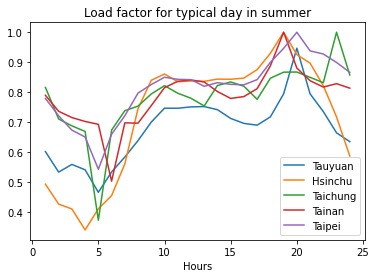

In [333]:
df_summer_typical_day.plot()
plt.title("Load factor for typical day in summer")

We get a dataframe called ```df_summer_typical_day``` consisting of hourly load factors for each location for the typical winter day in which the minimum error occurs.

In [334]:
df_summer_typical_day.mean() 

Tauyuan     0.679100
Hsinchu     0.723053
Taichung    0.781284
Tainan      0.786295
Taipei      0.814008
dtype: float64

In [335]:
lf.loc["average summer"]

Tauyuan       0.6791
Hsinchu     0.723053
Taichung    0.781284
Tainan      0.786295
Taipei      0.814008
Name: average summer, dtype: object

In [336]:
df_summer_typical_day.min()

Tauyuan     0.467073
Hsinchu     0.341951
Taichung    0.374389
Tainan      0.504361
Taipei      0.544019
dtype: float64

In [337]:
df_summer_typical_day.max() == lf.loc["max summer"]

Tauyuan     True
Hsinchu     True
Taichung    True
Tainan      True
Taipei      True
dtype: bool

In [338]:
df_summer_typical_day.min() == lf.loc["min summer"]

Tauyuan     True
Hsinchu     True
Taichung    True
Tainan      True
Taipei      True
dtype: bool